In [51]:
import seaborn as sns
df=sns.load_dataset("iris")
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

In [26]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [27]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [28]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["species"]=encoder.fit_transform(df["species"])

In [29]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


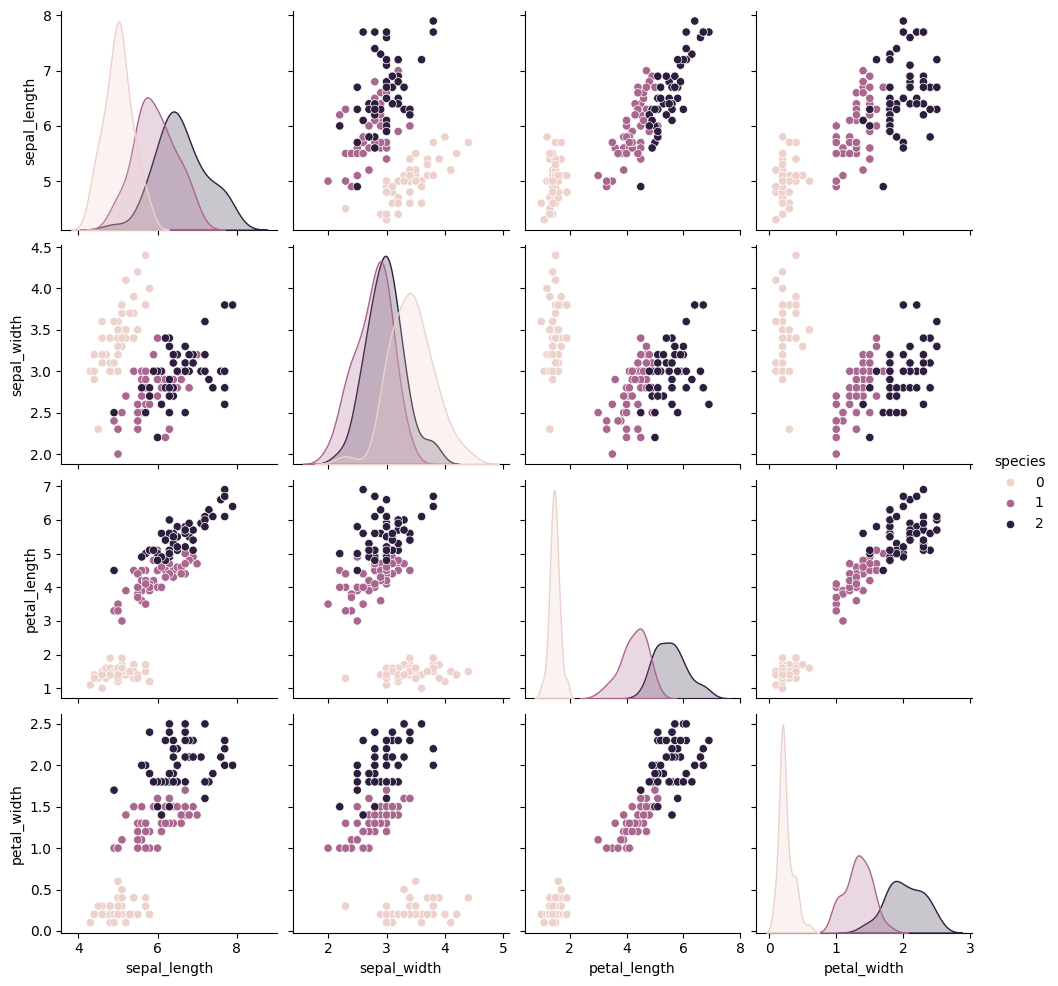

In [30]:
sns.pairplot(df,hue="species")

In [31]:
new_df=df[df["species"]!=0]

In [32]:
new_df.drop(columns=["petal_length","petal_width"],inplace=True)

C:\Users\lucius seneca\AppData\Local\Temp\ipykernel_17900\818810179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(columns=["petal_length","petal_width"],inplace=True)


In [33]:
df=new_df

In [34]:
new_df.head()

,sepal_length,sepal_width,species
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1


In [35]:
X=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [36]:
y

50     1
51     1
52     1
53     1
54     1
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 100, dtype: int32

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [38]:
clf1=LogisticRegression()
clf2=RandomForestClassifier()
clf3=KNeighborsClassifier()

In [41]:
estimators=[("lr",clf1),("rf",clf2),("knn",clf3)]
import numpy as np

In [42]:
for estimator in estimators:
    x=cross_val_score(estimator[1],X,y,cv=10,scoring="accuracy")
    print(estimator[0],np.round(np.mean(x),2))

lr 0.75
rf 0.59
knn 0.62


Hard Voting

In [48]:
vc=VotingClassifier(estimators=estimators,voting="hard")
x=cross_val_score(vc,X,y,cv=10,scoring="accuracy")
print(np.mean(x))

0.6799999999999999


Soft Voting

In [49]:
vc1=VotingClassifier(estimators=estimators,voting="soft")
x=cross_val_score(vc1,X,y,cv=10,scoring="accuracy")
print(np.mean(x))

0.65


Weighted Voting

In [50]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc=VotingClassifier(estimators=estimators,voting="soft",weights=[i,j,k])
            x=cross_val_score(vc,X,y,cv=10,scoring="accuracy")
            print("for i={},j={},k={}".format(i,j,k),np.mean(x))

for i=1,j=1,k=1 0.6399999999999999
for i=1,j=1,k=2 0.6399999999999999
for i=1,j=1,k=3 0.65
for i=1,j=2,k=1 0.63
for i=1,j=2,k=2 0.6399999999999999
for i=1,j=2,k=3 0.6399999999999999
for i=1,j=3,k=1 0.61
for i=1,j=3,k=2 0.63
for i=1,j=3,k=3 0.63
for i=2,j=1,k=1 0.67
for i=2,j=1,k=2 0.6799999999999999
for i=2,j=1,k=3 0.67
for i=2,j=2,k=1 0.68
for i=2,j=2,k=2 0.65
for i=2,j=2,k=3 0.6399999999999999
for i=2,j=3,k=1 0.63
for i=2,j=3,k=2 0.6499999999999999
for i=2,j=3,k=3 0.6399999999999999
for i=3,j=1,k=1 0.72
for i=3,j=1,k=2 0.69
for i=3,j=1,k=3 0.69
for i=3,j=2,k=1 0.6900000000000001
for i=3,j=2,k=2 0.6599999999999999
for i=3,j=2,k=3 0.65
for i=3,j=3,k=1 0.6799999999999999
for i=3,j=3,k=2 0.6399999999999999
for i=3,j=3,k=3 0.65


In [ ]:
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=1000,n_features=20,n_informative=15,n_redundant=5,random_state=2)

svm1=SVC(probability=True,kernel="poly",degree=1)
svm2=SVC(probability=True,kernel="poly",degree=2)
svm3=SVC(probability=True,kernel="poly",degree=3)
svm4=SVC(probability=True,kernel="poly",degree=4)
svm5=SVC(probability=True,kernel="poly",degree=5)

estimators=